<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science with Python</center>

# DSPy5 Pandas IoT I. Challenge. 

<img src="madrid_central.png" style="width: 600px">


Vamos a practicar series temporales con los [datos del "Sistema Integral de la Calidad del Aire del Ayuntamiento de Madrid"](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=41e01e007c9db410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default) que publica su portal de datos abiertos.

El objetivo de la práctica es ver cómo varió la presencia de monóxido de carbono (CO) en las mediciones realizadas por una estación de calidad del aire de dentro de Madrid Central, en torno a la fecha en que se activó por primera vez la restricción. **¿Disminuyó la concentracion de CO en el aire tras la aplicación de Madrid Central?**



## Inicialización

Crea una una celda temporal que contenga los siguientes comandos:
    * !conda install --yes --prefix {sys.prefix} geopandas
    * !conda install -c conda-forge --yes --prefix {sys.prefix} mplleaflet

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 9)
from pathlib import Path


In [2]:
import geopandas as gpd
from shapely.geometry import Point
import mplleaflet


## Pasos

### Carga de los datos

Madrid Central entró en vigor el **30 de noviembre de 2018**. Desafortunadamente, los datos vienen en este caso en CSV por mes. **Lee todos los CSVs de 2018 y 2019 en un único dataframe.**


In [3]:
mc = []
for csv_file in Path('.').glob('Anio*/*.csv'):
    df = pd.read_csv(csv_file, index_col=None, header=0,sep=";")
    mc.append(df)
frame = pd.concat(mc,ignore_index=True)
frame
#frame.to_csv( "frame.csv", index=False, encoding='utf-8-sig')


,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2020,3,2,0.00,N,...,4.00,V,3.00,V,3.00,V,3.00,V,2.00,V
1,28,79,4,1,28079004_1_38,2020,3,3,2.00,V,...,0.00,N,0.00,N,0.00,N,0.00,N,0.00,N
2,28,79,4,6,28079004_6_48,2020,3,2,0.00,N,...,0.10,V,0.10,V,0.10,V,0.10,V,0.10,V
3,28,79,4,6,28079004_6_48,2020,3,3,0.10,V,...,0.00,N,0.00,N,0.00,N,0.00,N,0.00,N
4,28,79,4,7,28079004_7_8,2020,3,2,0.00,N,...,2.00,V,1.00,V,1.00,V,1.00,V,1.00,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109458,28,79,60,14,28079060_14_6,2019,2,24,26.09,V,...,29.83,V,7.17,V,4.60,V,5.08,V,4.36,V
109459,28,79,60,14,28079060_14_6,2019,2,25,4.01,V,...,11.36,V,4.60,V,4.53,V,3.87,V,4.15,V
109460,28,79,60,14,28079060_14_6,2019,2,26,4.44,V,...,29.34,V,15.45,V,22.98,V,16.72,V,6.13,V
109461,28,79,60,14,28079060_14_6,2019,2,27,4.53,V,...,19.24,V,6.18,V,10.44,V,6.32,V,6.49,V


### Filtrado

El siguiente plot muestra sobre un mapa la zona a la que aplica Madrid Central, junto con las estaciones de medición de calidad del aire:

In [4]:
gdf = gpd.read_file("Madrid_Central/Madrid_Central.shp")
gdf = gdf.to_crs(epsg=3857)
est = pd.read_csv('estaciones.csv', delimiter=';', encoding='latin-1', decimal='.')
gdf_est = gpd.GeoDataFrame(
    est, 
    geometry=[Point(x, y) for x, y in zip(est.LONGITUD, est.LATITUD)]
)
gdf_est.crs = {'init' :'epsg:4326'}
gdf_est = gdf_est.to_crs(epsg=3857)
import mplleaflet
ax = gdf.plot(facecolor='grey', edgecolor='black')
gdf_est.plot(ax=ax, marker='+', color='black', markersize=300.0)
mplleaflet.display(fig=ax.figure, crs=gdf.crs)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


La única estación que está dentro de Madrid Central plenamente es la de "Pza. del Carmen". **Filtra el dataframe `air_q` para quedarte con la información relativa solo a esa estación**. Busca manualmente qué puedes usar para filtrar en `estacion.csv`, ayudándote de la documentación en el PDF `Interprete_ficheros_ calidad_ del_ aire_global.pdf`. Elimina las columnas `PROVINCIA`, `MUNICIPIO`, `ESTACION`y `PUNTO_MUESTREO`, que ya no las vamos a necesitar.

In [5]:
#est.where(est.ESTACION == "Pza. del Carmen")
#est.ESTACION
#est.drop(['B', 'C'], axis=1)
#type(frame)
frame
frame.loc[frame['PUNTO_MUESTREO'] == '28079035_1_38']
##df.loc[df.iloc[:,0].str.contains(r'(Hel|Just)')]
air_q = frame.loc[frame['PUNTO_MUESTREO'].str.contains(r'(28079035_*)')]
air_q = air_q.drop(['PUNTO_MUESTREO', 'MUNICIPIO','PROVINCIA','ESTACION'], axis=1)
air_q

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,MAGNITUD,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
1808,1,2020,3,1,8.00,V,7.00,V,7.00,V,...,11.00,V,10.00,V,9.00,V,9.00,V,9.00,V
1809,1,2020,3,2,9.00,V,9.00,V,9.00,V,...,9.00,V,9.00,V,9.00,V,9.00,V,9.00,V
1810,1,2020,3,3,8.00,V,8.00,V,7.00,V,...,9.00,V,11.00,V,14.00,V,21.00,V,22.00,V
1811,1,2020,3,4,23.00,V,20.00,V,18.00,V,...,4.00,V,5.00,V,4.00,V,3.00,V,3.00,V
1812,1,2020,3,5,2.00,V,1.00,V,2.00,V,...,5.00,V,4.00,V,3.00,V,2.00,V,2.00,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107162,14,2019,2,24,2.84,V,3.79,V,3.05,V,...,60.27,V,10.94,V,9.46,V,5.60,V,5.94,V
107163,14,2019,2,25,6.30,V,2.54,V,2.75,V,...,33.84,V,7.13,V,2.85,V,2.56,V,2.42,V
107164,14,2019,2,26,2.40,V,2.29,V,2.47,V,...,25.37,V,17.19,V,17.27,V,10.31,V,2.14,V
107165,14,2019,2,27,1.96,V,2.06,V,1.96,V,...,29.52,V,27.12,V,33.92,V,17.29,V,28.13,V


### Cambio de estructura de los valores de medición

Si atendemos a `Interprete_ficheros_ calidad_ del_ aire_global.pdf`, observamos que las mediciones vienen en un formato con el que no nos va a resultar muy sencillo trabajar: cada fila contiene 24 mediciones (una por hora) de cada uno de los compuestos que se miden en el aire (el compuesto que se mide viene indicado en la columna `MAGNITUD`). Para facilitar que trabajemos con ello, vamos a hacer que cada fila contenga solo una hora (y la medición de esa hora). Por tanto, por cada fila de `air_q`, vamos a tener 24 filas de `unstacked_air_q`:

In [6]:
unstacked_air_q = air_q.filter(regex="H.*").unstack().reset_index(level=0)
unstacked_air_q


,level_0,0
1808,H01,8.00
1809,H01,9.00
1810,H01,8.00
1811,H01,23.00
1812,H01,2.00
...,...,...
107162,H24,5.94
107163,H24,2.42
107164,H24,2.14
107165,H24,28.13



Las nuevas filas de `unstacked_air_q` preservan el índice de la fila a partir del cual se generaron. **Mergea unstacked_air_q con air_q**. Así tendremos air_q con una medición por hora y fila:

In [7]:
air_merged = pd.merge(left=unstacked_air_q,right=air_q,how='inner',left_index=True,right_index=True)
air_merged

,level_0,0,MAGNITUD,ANO,MES,DIA,H01,V01,H02,V02,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
1808,H01,8.00,1,2020,3,1,8.00,V,7.00,V,...,11.00,V,10.00,V,9.00,V,9.00,V,9.00,V
1808,H02,7.00,1,2020,3,1,8.00,V,7.00,V,...,11.00,V,10.00,V,9.00,V,9.00,V,9.00,V
1808,H03,7.00,1,2020,3,1,8.00,V,7.00,V,...,11.00,V,10.00,V,9.00,V,9.00,V,9.00,V
1808,H04,7.00,1,2020,3,1,8.00,V,7.00,V,...,11.00,V,10.00,V,9.00,V,9.00,V,9.00,V
1808,H05,8.00,1,2020,3,1,8.00,V,7.00,V,...,11.00,V,10.00,V,9.00,V,9.00,V,9.00,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107166,H20,26.47,14,2019,2,28,23.01,V,17.35,V,...,26.47,V,14.01,V,10.95,V,3.59,V,3.18,V
107166,H21,14.01,14,2019,2,28,23.01,V,17.35,V,...,26.47,V,14.01,V,10.95,V,3.59,V,3.18,V
107166,H22,10.95,14,2019,2,28,23.01,V,17.35,V,...,26.47,V,14.01,V,10.95,V,3.59,V,3.18,V
107166,H23,3.59,14,2019,2,28,23.01,V,17.35,V,...,26.47,V,14.01,V,10.95,V,3.59,V,3.18,V


**Elimina ahora todas las columnas "H*" y "V*", que ya no son necesarias**:

In [8]:
air_merged = air_merged.drop(air_merged.iloc[:, 6:54],axis = 1) 
air_merged.head(24)

,level_0,0,MAGNITUD,ANO,MES,DIA
1808,H01,8.0,1,2020,3,1
1808,H02,7.0,1,2020,3,1
1808,H03,7.0,1,2020,3,1
1808,H04,7.0,1,2020,3,1
1808,H05,8.0,1,2020,3,1
1808,H06,7.0,1,2020,3,1
1808,H07,7.0,1,2020,3,1
1808,H08,8.0,1,2020,3,1
1808,H09,7.0,1,2020,3,1
1808,H10,7.0,1,2020,3,1


**Renombra `level_0` a `HORA` y `0` a VALOR`**:

In [9]:
air_merged = air_merged.rename(columns={"level_0": "HORA", 0: "VALOR"})
air_merged

,HORA,VALOR,MAGNITUD,ANO,MES,DIA
1808,H01,8.00,1,2020,3,1
1808,H02,7.00,1,2020,3,1
1808,H03,7.00,1,2020,3,1
1808,H04,7.00,1,2020,3,1
1808,H05,8.00,1,2020,3,1
...,...,...,...,...,...,...
107166,H20,26.47,14,2019,2,28
107166,H21,14.01,14,2019,2,28
107166,H22,10.95,14,2019,2,28
107166,H23,3.59,14,2019,2,28


### Indexar por tiempo

Ahora, crea una nueva columna a partir de `"ANO", "MES", "DIA", "HORA"` y elimina el resto:

In [10]:
# Convierte la columna "HORA" en un entero
air_merged['HORA'] = air_merged['HORA'].replace('H', '', regex=True).astype(int)
air_merged['HORA'] = air_merged.HORA.map("{:02,d}".format)
#air_merged.info()
# Cambia el valor "24" de "HORA" por "OO"
air_merged['HORA']=air_merged['HORA'].replace(to_replace='24',value='00')
# Crea la nueva columna "TIMESTAMP"
air_merged

air_merged['TIMESTAMP'] = air_merged['ANO'].map(str) + '-' + air_merged['MES'].map(str) + '-' + air_merged['DIA'].map(str) + ' ' + air_merged['HORA'].map(str)
air_merged['TIMESTAMP'] = pd.to_datetime(air_merged.TIMESTAMP, format="%Y-%m-%d")

### Magnitudes medidas
Pivota ahora la tabla en torno a `MAGNITUD`, para que cada magnitud sea una columna. Esta tabla pivotada tendrá como índice "TIMESTAMP", como valores "VALOR" y como columnas "MAGNITUD". 

In [11]:
air_merged = air_merged.pivot_table(values='VALOR', index=['TIMESTAMP'], columns='MAGNITUD')

Ponle nombre a las magnitudes según lo que se explica en `Interprete_ficheros_ calidad_ del_ aire_global.pdf`

In [12]:
air_merged = air_merged.rename(columns={1: "Dioxido de Azufre", 6: "Monoxido de Carbono",7: "Monoxido de Nitrogeno",8:"Dioxido de Nitrogeno",12:"Oxidos de Nitrogeno",14:"Ozono"})
air_merged

MAGNITUD,Dioxido de Azufre,Monoxido de Carbono,Monoxido de Nitrogeno,Dioxido de Nitrogeno,Oxidos de Nitrogeno,Ozono
TIMESTAMP,,,,,,
2018-01-01 00:00:00,6.0,0.4,2.0,22.0,25.0,32.60
2018-01-01 01:00:00,5.0,0.2,2.0,19.0,21.0,41.97
2018-01-01 02:00:00,5.0,0.3,3.0,29.0,34.0,30.16
2018-01-01 03:00:00,6.0,0.2,7.0,35.0,45.0,24.23
2018-01-01 04:00:00,6.0,0.2,13.0,38.0,57.0,24.16
...,...,...,...,...,...,...
2020-03-31 19:00:00,4.0,0.3,2.0,42.0,45.0,37.73
2020-03-31 20:00:00,4.0,0.3,1.0,37.0,38.0,48.82
2020-03-31 21:00:00,4.0,0.4,1.0,48.0,50.0,33.45


### Primer plot: efecto inmediato de Madrid Central

**Vamos a plotear el monóxido de carbono para todo el rango de fechas que disponemos.** Marcaremos con una barra roja la entrada en vigor de Madrid Central.

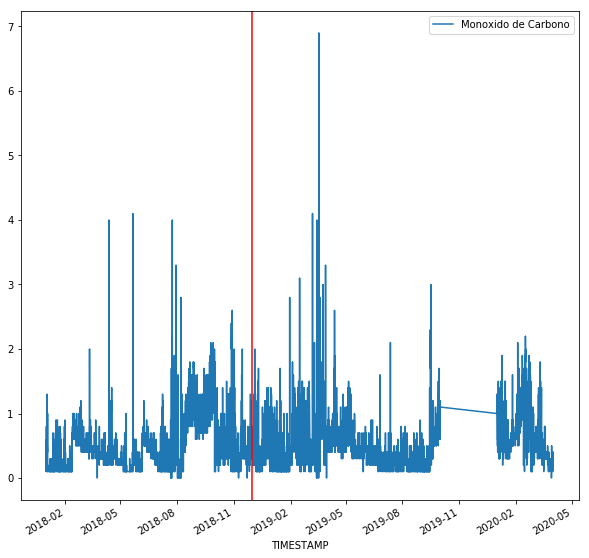

In [13]:
# Plot
# ...
#air_merged.plot(figsize=(10,10));
air_merged.reset_index().plot(x='TIMESTAMP', y='Monoxido de Carbono',figsize=(10,10))
#print (air_merged.index)
plt.axvline(x='2018-11-30', color='red')

### Segundo plot: medición de la diferencia

Esto no nos deja del todo bien observar si hay un impacto real... Vamos a plotear la diferencia punto a punto entre 2018 y 2019. Para ello vamos a realizar una serie de acciones:

**Crea una nueva columna "MES_DIA", en la que para cada fila solo aparezca MES-DIA como un string.** E.g., para 2019-08-02 01:00:00 -> 2019-08.

In [34]:
#air_merged = air_merged.resample('D').mean()
#data_mes_reformat = air_merged.index.strftime('%m-%d')
#air_merged

air_merged = air_merged.resample('D').mean()
#air_merged
MES_DIA_reformat=air_merged.index.strftime('%m-%d').tolist()
MES_reformat = air_merged.index.strftime('%m').tolist()
data = { 'Monóxido de Carbono': air_merged['Monoxido de Carbono'], 'MES_DIA': MES_DIA_reformat }  
air_merged_tmp = pd.DataFrame(data,index=air_merged.index)


**De `air_q`, selecciona las fechas entre '2019-01' y '2019-09', y setea "MES_DIA" como índice de esa selección.** Haz lo mismo para 2018.

In [27]:
air_merged_tmp_2019=air_merged_tmp['20190101':'20190930'].set_index('MES_DIA')
air_merged_tmp_2018=air_merged_tmp['20180101':'20180930'].set_index('MES_DIA')
air_merged_tmp_2020=air_merged_tmp['20200101':'20200330'].set_index('MES_DIA')

# Pico en Sept 2019 con respecto a 2018
air_merged_tmp_2019_tmp=air_merged_tmp['20190901':'20190930'].set_index('MES_DIA')
air_merged_tmp_2018_tmp=air_merged_tmp['20180901':'20180930'].set_index('MES_DIA')

diff_tmp = air_merged_tmp_2019_tmp - air_merged_tmp_2018_tmp

# Visualizar el mes de Marzo de 2020 en comparativa con Marzo de 2019
air_merged_tmp_2019_tmp3 = air_merged_tmp['20190301':'20190331'].set_index('MES_DIA')
air_merged_tmp_2020_tmp3 = air_merged_tmp['20200301':'20200331'].set_index('MES_DIA')

diff3 = air_merged_tmp_2020_tmp3 - air_merged_tmp_2019_tmp3
diff3.head(31)
diff_tmp.head(30)


,Monóxido de Carbono
MES_DIA,
09-01,-0.679167
09-02,-0.804167
09-03,-0.737500
09-04,-0.762500
09-05,-0.700000
09-06,-0.679167
09-07,-0.762500
09-08,-0.708333
09-09,-0.650000


**Resta ambas selecciones: gracias a que las operaciones se alinean por índice, habremos restado las medidas día a día**

In [16]:
diff_19_18 = air_merged_tmp_2019 - air_merged_tmp_2018
diff_20_19 = air_merged_tmp_2020 - air_merged_tmp_2019

**Plotea el resultado tal cual, y suavizado.** ¿Cuál es tu conclusión?

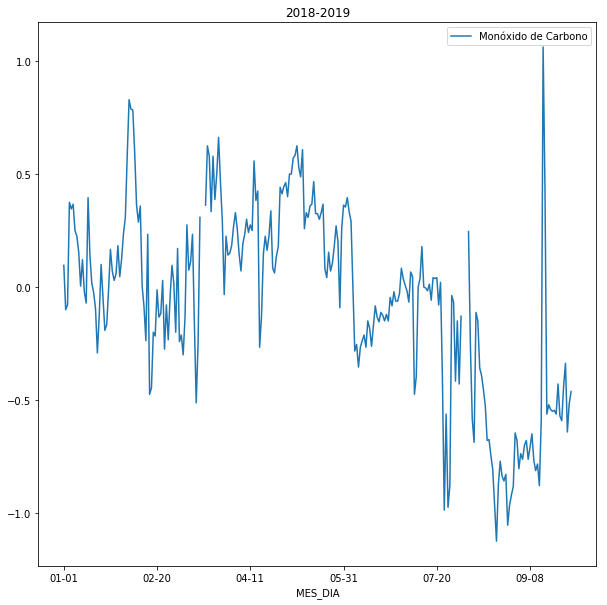

In [17]:
diff_19_18.plot(figsize=(10,10),title="2018-2019")

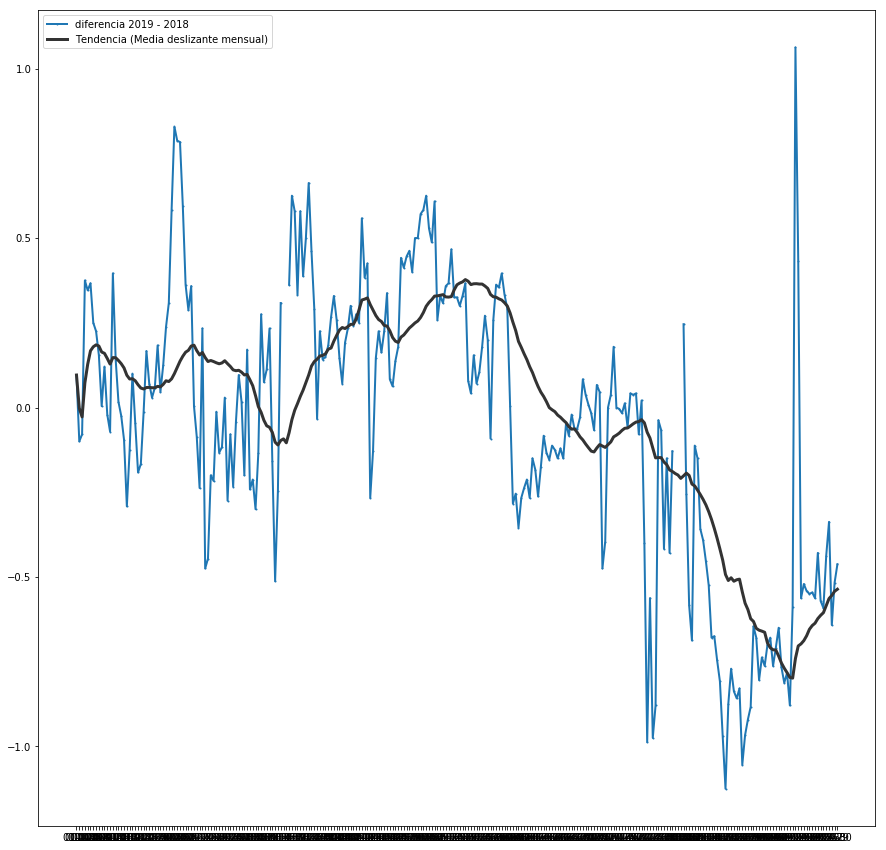

In [18]:
# Grafica suavizada a media mensual 

#ventana_10 = diff_19_18.rolling(window=10, min_periods=1).mean()
ventana_30 = diff_19_18.rolling(window=30, min_periods=1).mean()

fig, eje = plt.subplots(figsize=(15,15))

eje.plot(diff_19_18, marker='.', markersize=2,
linewidth=2, label='diferencia 2019 - 2018')

#eje.plot(diff_19_18, marker='.', markersize=2, color='0.6',
#linewidth=2, label='diff')

eje.plot(ventana_30, color='0.2', linewidth=3,
label='Tendencia (Media deslizante mensual)')
eje.legend()

## Resultados de Madrid Central 2018-2019

In [19]:
# Total de mediciones en que el valor del monoxido de carbono ha sido mayor en 2019 que en 2018
(diff_19_18['Monóxido de Carbono'] > 0).sum()

132

In [20]:
# Total de mediciones en que el valor del monoxido de carbono ha sido mayor en 2018 que en 2019
(diff_19_18['Monóxido de Carbono'] < 0).sum()

136

#### A partir del mes de Mayo la tendencia es claramente a la baja , si bien tomando los datos dia a dia de ambos periodos (2018-2019), el numero de dias en que lo niveles de contaminacion bajaron apenas difieren en 4.El pico que se observa en la grafica, corresponde a los dias 15 y 16 de Septiembre.

## Influencia del COVID-19 en Madrid Central 

In [21]:
# Total de mediciones en que el valor del monoxido de carbono ha sido mayor en 2020 que en 2019
(diff_20_19['Monóxido de Carbono'] > 0).sum()

61

In [22]:
# Total de mediciones en que el valor del monoxido de carbono ha sido mayor en 2019 que en 2020 (en los 3 primeros meses)
(diff_20_19['Monóxido de Carbono'] < 0).sum()

25

#### Aunque globalmente en los 3 primeros meses los datos de Monoxido de carbono son mayores en 2020 que en 2019, mirando mes a mes , podemos observar que a partir del 14 de Marzo de 2020 los valores de Monoxido de carbono bajan de manera continua, por lo tanto como era de esperar el confinamiento y las restricciones han bajado de manera notable las emisiones.

In [23]:
diff3.head(31)

,Monóxido de Carbono
MES_DIA,
03-01,-0.070833
03-02,0.125000
03-03,-0.050000
03-04,0.379167
03-05,0.366667
03-06,0.283333
03-07,0.195833
03-08,-0.029167
03-09,-0.075000


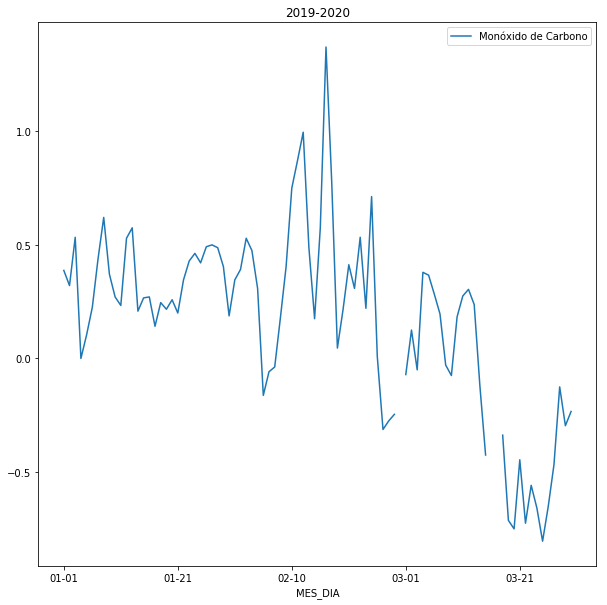

In [24]:
# Grafica del resultado de comparar 2019 y 2020
diff_20_19.plot(figsize=(10,10),title="2019-2020")

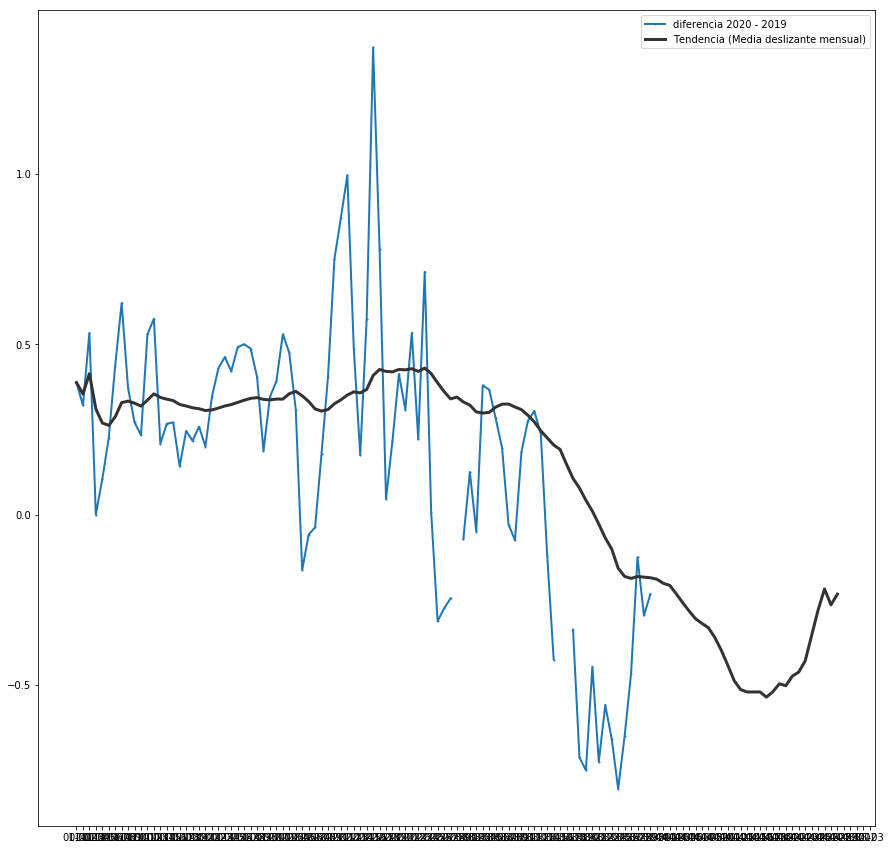

In [25]:
# Grafica suavizada a media mensual 

#ventana_10 = diff_19_18.rolling(window=10, min_periods=1).mean()
ventana_30 = diff_20_19.rolling(window=30, min_periods=1).mean()

fig, eje = plt.subplots(figsize=(15,15))

eje.plot(diff_20_19, marker='.', markersize=2,
linewidth=2, label='diferencia 2020 - 2019')

#eje.plot(diff_19_18, marker='.', markersize=2, color='0.6',
#linewidth=2, label='diff')

eje.plot(ventana_30, color='0.2', linewidth=3,
label='Tendencia (Media deslizante mensual)')
eje.legend()